## importer les librairies

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

## Importer le dataset

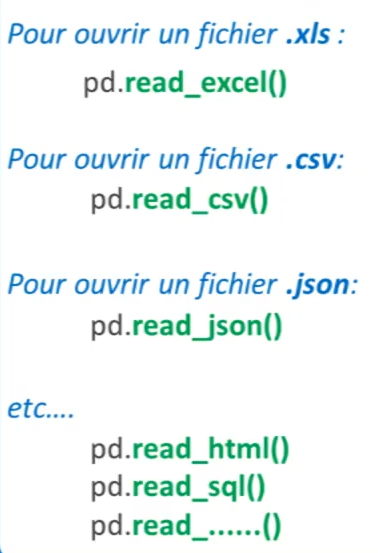

In [2]:
dataset = pd.read_csv("Data.csv")

In [4]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [6]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [8]:
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


## faire la difference entre les variables indépendantes (predictible ou feature) et dependantes (à predire)
les variables indépendantes sont Country, Age et Salary et dépendantes: Purchased

On veut savoir si client va acheter un de ces nouveaux produits

## Visualiser 

In [54]:
dataset.shape

(10, 4)

In [55]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


On peut supprimer certains elements en utiliser la methode drop

`dataset.drop([""],axis=1)`

In [56]:
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [57]:
pd.set_option('display.max_rows',dataset.shape[0]+1) # pour tout la base de données
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Compter un element 

In [58]:
dataset['Country'].value_counts()

France     4
Spain      3
Germany    3
Name: Country, dtype: int64

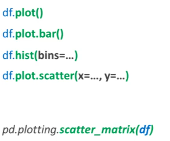

<AxesSubplot:>

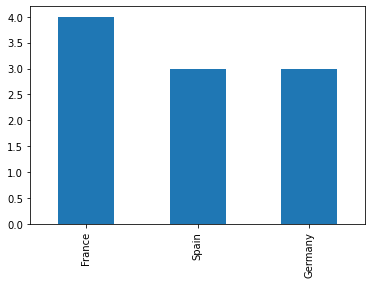

In [59]:
dataset['Country'].value_counts().plot.bar()

<AxesSubplot:>

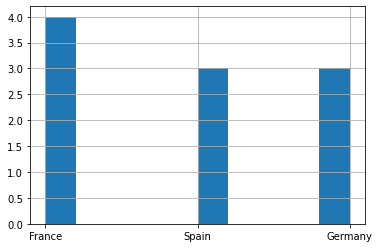

In [60]:
dataset['Country'].hist()

<AxesSubplot:>

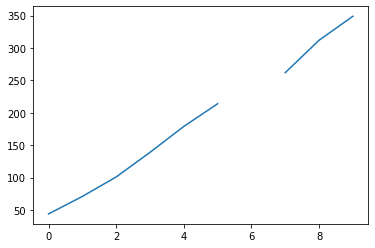

In [61]:
dataset['Age'].cumsum().plot()

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Salary', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Salary'>,
        <AxesSubplot:xlabel='Salary', ylabel='Salary'>]], dtype=object)

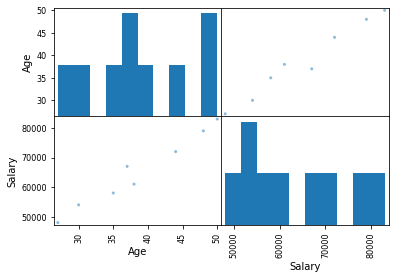

In [62]:
pd.plotting.scatter_matrix(dataset)

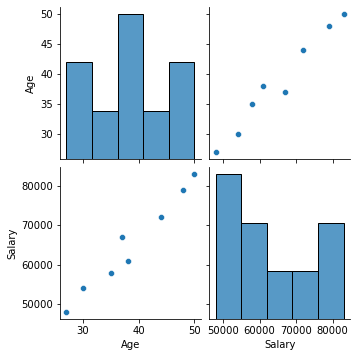

In [9]:
sns.pairplot(dataset)

In [64]:
pd.set_option('display.max_rows',10) # limiter l'affichage à 10

### Recuperer les variables predictibles
>**note**: les variables à predire sont dernier on peut donc utiliser le slicing

In [65]:
# on le transforme en tableau numpy
X = dataset.iloc[:,:-1].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [66]:
y = dataset.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

## gestion des données manquantes
* si les données sont distribuées normalement : on peut remplacer par la moyenne
* si les données sont trop distribuées avec la moyenne: on peut remplacer avec la mediane de la colonne
* si les données se ressemble au fur et à mesure: on remplace avec la donnée précédente
* si les données sont très nombreux: on peut supprimer les lignes des données manquantes

### SimpleImputer

In [8]:
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute._base:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)
 |  
 |  Imputation transformer for completing missing values.
 |  
 |  Read more in the :ref:`User Guide <impute>`.
 |  
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |  
 |  Parameters
 |  ----------
 |  missing_values : int, float, str, np.nan or None, default=np.nan
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      should be set to `np.nan`, since `pd.NA` will be converted to `np.nan`.
 |  
 |  strategy : string, default='mean'
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values u

In [31]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

on peut aussi utiliser `dataset.fillnan(dataset[''].mean())`

On peut aussi les supprimer 

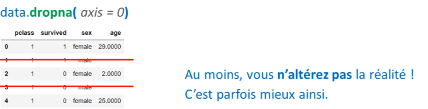

On peut aussi utiliser np.inf etc. et on peut remplacer par des nombres precises (dans ce cas mettre strategy à constant et mettre ça valeur dans le paramettre fill_value)

In [28]:
imputer.fit(X[:,1:3])

SimpleImputer()

In [29]:
X[:,1:3] = imputer.transform(X[:,1:3])
X[:,1:3]

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, 63777.77777777778],
       [35.0, 58000.0],
       [38.77777777777778, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

verification

In [47]:
X[:,1:2].mean(),X[:,2:3].mean()

(0.3, 0.3)

### KNNImputer

In [48]:
from sklearn.impute import KNNImputer

In [53]:
KNNI = KNNImputer(n_neighbors = 3)# 3 est la valeur des voisins a regardé
KNNI.fit_transform(X[:,1:3]) # on peut optimiser le nombre ne n_voisin

array([[4.40000000e+01, 7.20000000e+04],
       [2.70000000e+01, 4.80000000e+04],
       [3.00000000e+01, 5.40000000e+04],
       [3.80000000e+01, 6.10000000e+04],
       [4.00000000e+01, 6.66666667e+04],
       [3.50000000e+01, 5.80000000e+04],
       [3.06666667e+01, 5.20000000e+04],
       [4.80000000e+01, 7.90000000e+04],
       [5.00000000e+01, 8.30000000e+04],
       [3.70000000e+01, 6.70000000e+04]])

### MissingIndicator
avantages optimisation est possible

In [54]:
from sklearn.impute import MissingIndicator

In [55]:
MissingIndicator().fit_transform(X[:,1:3]) 

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False]])

### gerer les données categoriques

il faut voir ici si les données sont ordinal ou normales.

* lorsque les données sont norminales ou one hot alors ils n'y a pas d'ordre entre les données
* lorsque les données sont ordinales alors ils y'a  d'ordre entre les données: on associe chaque catégorie ou classe d'une variable à une valeur **decimale unique**.


**ici les informations dans notre cas sont norminales** 

In [13]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [14]:
encoder_x = LabelEncoder()
X[:,0] = encoder_x.fit_transform(X[:,0])
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

Cette methode n'est pas bonne sauf au niveau des arbres de decisions

Pour ce faire on utilise l'encodage One hot

**Remarque:*** on peut utiliser aussi `LabelBinarizer` qui est toujours dans le package `sklearn.preprocessing`

In [31]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')
onehotencorder = ColumnTransformer(
   [('one_hot_encoder', OneHotEncoder(), [0])], # on precise la colonne et l'encodeur
   remainder='passthrough'                     
)

X = onehotencorder.fit_transform(X)
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [16]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### diviser la base de données en train et test

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42) # 30%

## Feature scaling
il est important pour avoir des données qui ne persent pas plus que d'autres

In [33]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,PolynomialFeatures

In [19]:
sc = StandardScaler()

In [20]:
X_train_sc = sc.fit_transform(X_train) # on transforme et on execute
X_test_sc = sc.transform(X_test)

In [21]:
X_train_sc

array([[ 1.15470054, -0.63245553, -0.63245553,  0.8790543 ,  0.8892086 ],
       [ 1.15470054, -0.63245553, -0.63245553,  1.64292217,  1.67822469],
       [-0.8660254 ,  1.58113883, -0.63245553, -1.79448326, -1.1396899 ],
       [ 1.15470054, -0.63245553, -0.63245553, -0.45771448,  0.32562569],
       [-0.8660254 ,  1.58113883, -0.63245553,  0.11518643, -0.03757219],
       [-0.8660254 , -0.63245553,  1.58113883, -0.26674751, -0.35067382],
       [-0.8660254 , -0.63245553,  1.58113883, -0.11821765, -1.36512307]])

In [22]:
X_test_sc

array([[-0.8660254 ,  1.58113883, -0.63245553,  2.02485611,  2.12909102],
       [-0.8660254 , -0.63245553,  1.58113883, -2.36738416, -1.8159894 ],
       [ 1.15470054, -0.63245553, -0.63245553, -0.83964842, -0.68882357]])

utilisation de MinMaxScaler

In [34]:
mmc = MinMaxScaler()

In [35]:
X_train_mmc = sc.fit_transform(X_train) # on transforme et on execute
X_test_mmc = sc.transform(X_test)

Créeation de nouvelles caracteristiques

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
PolynomialFeatures(3).fit_transform(X[:,3:4])

array([[1.00000000e+00, 4.40000000e+01, 1.93600000e+03, 8.51840000e+04],
       [1.00000000e+00, 2.70000000e+01, 7.29000000e+02, 1.96830000e+04],
       [1.00000000e+00, 3.00000000e+01, 9.00000000e+02, 2.70000000e+04],
       [1.00000000e+00, 3.80000000e+01, 1.44400000e+03, 5.48720000e+04],
       [1.00000000e+00, 4.00000000e+01, 1.60000000e+03, 6.40000000e+04],
       [1.00000000e+00, 3.50000000e+01, 1.22500000e+03, 4.28750000e+04],
       [1.00000000e+00, 3.87777778e+01, 1.50371605e+03, 5.83107668e+04],
       [1.00000000e+00, 4.80000000e+01, 2.30400000e+03, 1.10592000e+05],
       [1.00000000e+00, 5.00000000e+01, 2.50000000e+03, 1.25000000e+05],
       [1.00000000e+00, 3.70000000e+01, 1.36900000e+03, 5.06530000e+04]])

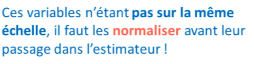

In [44]:
from sklearn.preprocessing import Binarizer

In [45]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [56]:
Binarizer(threshold = 30).fit_transform(X[:,3:4])

ValueError: Found array with 0 feature(s) (shape=(10, 0)) while a minimum of 1 is required.

# Feature engenierie
Feature selection 
*voici une dataset qui va nous servir d'exemple*

In [60]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

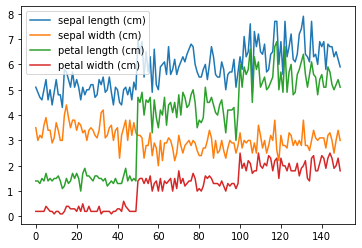

In [63]:
iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names);

On voit que sepal width varie peu par rapport aux autres

### Selecteur de variance

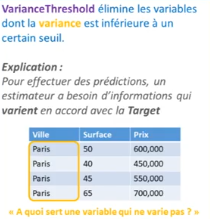

In [67]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

Cherchons à filtrer une variable

In [68]:
from sklearn.feature_selection import VarianceThreshold

In [70]:
selector_VT = VarianceThreshold(threshold=0.2)
selector_VT.fit_transform(X)

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

On voit que sepal width a été supprimer, 

Comment le verifier??

In [71]:
selector_VT.get_support()

array([ True, False,  True,  True])

In [73]:
np.array(iris.feature_names)[selector_VT.get_support()]
# les variables qui ont été selectionnées

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

### par le test de dependance
Selecteur par un test statistique

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect,SelectKBest
from sklearn.feature_selection import SelectPercentile,SelectFpr,SelectFwe
from sklearn.feature_selection import SelectFdr

#### SelectKBest
Voici la liste des tests de dépendance : 
`chi2 , f_classif,f_mutual_info_classif` : chi2 et anova

`f_regression,f_mutual_info_regression`: Pearson correlation

Choississons le test de chi2

In [83]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

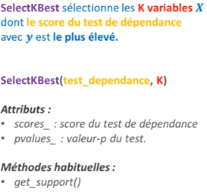

In [77]:
chi2(X,y)#o presente les scores et les p_valeurs

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

plus le score est grand plus la variable depend de la sortie 

In [82]:
selector_SB = SelectKBest(chi2,k=2)
selector_SB.fit_transform(X,y);
selector_SB.get_support()

array([False, False,  True,  True])

In [85]:
selector_SB = SelectKBest(f_classif,k=2)
selector_SB.fit_transform(X,y);
selector_SB.get_support()

array([False, False,  True,  True])

Par le poucentage des p_values

In [86]:
from sklearn.feature_selection import SelectPercentile

In [92]:
selector_SP = SelectPercentile(f_classif,percentile=10)
selector_SP.fit_transform(X,y);
selector_SP.get_support()

array([False, False,  True, False])

### Sélecteur avec un estimateur de coeficient

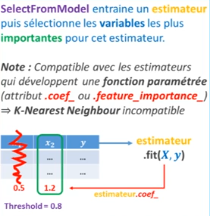

In [94]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [102]:
selector = SelectFromModel(SGDClassifier(random_state=42),threshold='mean')
selector.fit_transform(X,y)
selector.get_support()

array([False,  True,  True,  True])

In [104]:
selector.estimator_.coef_.mean(axis=0)

array([-18.41934997, -53.80686764,  43.88831531,   7.75668868])

## Recursive Feature Selection

In [105]:
from sklearn.feature_selection import RFE,RFECV

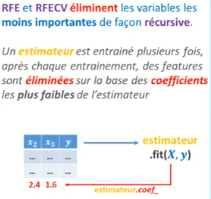

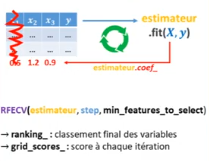

In [142]:
selector_cv = RFECV(SGDClassifier(random_state=0),
                    step=1,
                    min_features_to_select=2,
                    cv = 5)
'''step est le nombre de caractéristique à elever
min_features_to_select valeur minimal à obtenir
cv = nombre de cross_validation
'''
selector_cv.fit_transform(X,y);
selector_cv.ranking_

array([2, 1, 1, 1])

In [143]:
selector_cv.grid_scores_

array([0.8       , 0.84666667, 0.77333333])